author: @SteveEckel

This example covers Rabi flopping in a magnetic field for a single spin.  This
should be compared most closely to examples/hamiltonians/00_spin_in_magnetic_field.py

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cts
import pylcp
from pylcp.common import spherical2cart, cart2spherical
plt.style.use('paper')

### First, define the problem:
$g_F > 0$ implies a magnetic moment $\mu$ that is opposite $F$.  If the magnetic moment is opposite the spin, then it will rotate counter clockwise when viewed from the tip of the magnetic field vector.

In [18]:
gF = 1 
H_0, mu_q = pylcp.hamiltonians.singleF(1/2, gF=gF, muB=1)
print(mu_q)
# Construct operators for calculation of expectation values of spin and mu:
mu = spherical2cart(mu_q)
S = -mu/gF # Note that muB=1

hamiltonian = pylcp.hamiltonian()
hamiltonian.add_H_0_block('g', H_0)
hamiltonian.add_mu_q_block('g', mu_q)

magField = pylcp.constantMagneticField(np.array([1., 0., 0.]))
laserBeams = {}

[[[ 0.         -0.70710678]
  [ 0.          0.        ]]

 [[ 0.5         0.        ]
  [ 0.         -0.5       ]]

 [[ 0.          0.        ]
  [ 0.70710678  0.        ]]]


Now, create the OBE:

[[0.+0.j  0.+0.5j 0.-0.5j 0.+0.j ]
 [0.+0.5j 0.+0.j  0.+0.j  0.-0.5j]
 [0.-0.5j 0.+0.j  0.+0.j  0.+0.5j]
 [0.+0.j  0.-0.5j 0.+0.5j 0.+0.j ]]


[[<matplotlib.lines.Line2D at 0x7fc5add51790>],

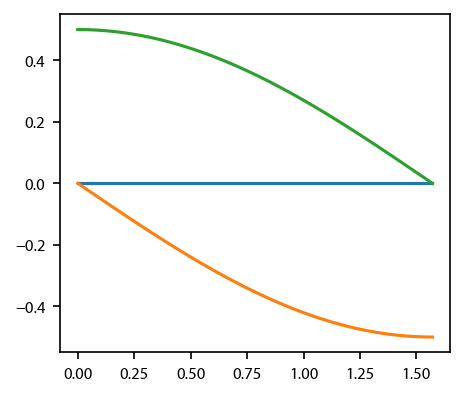

In [17]:
obe = pylcp.obe(laserBeams, magField, hamiltonian, transform_into_re_im=False)
print(np.sum([obe.ev_mat['B'][ii]*cart2spherical(magField.Field())[ii] for ii in range(3)], axis=0))
pop = np.zeros((H_0.shape[0],))
pop[-1] = 1

obe.set_initial_rho_from_populations(pop)
obe.evolve_density([0, np.pi/2], t_eval=np.linspace(0, np.pi/2, 51))
avS = obe.observable(S)

fig, ax = plt.subplots(1, 1)
[ax.plot(obe.sol.t, avS[ii]) for ii in range(3)]

Take the last value and propogate around z:

[[<matplotlib.lines.Line2D at 0x7fc5ac4e00d0>],

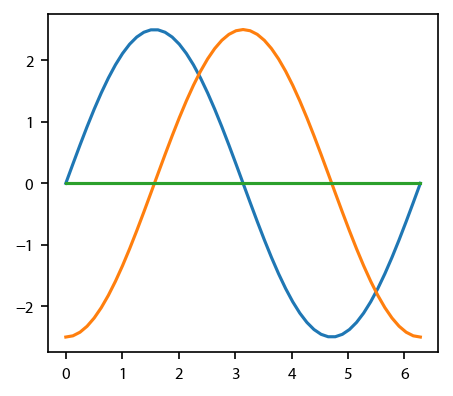

In [4]:
obe.set_initial_rho(obe.sol.rho[:, :, -1])
obe.magField = pylcp.magField(lambda R: np.array([0., 0., 1.]))
obe.evolve_density([0, 2*np.pi], t_eval=np.linspace(0, 2*np.pi, 51))
avS = obe.observable(S)

fig, ax = plt.subplots(1, 1)
[ax.plot(obe.sol.t, avS[ii]) for ii in range(3)]